In [167]:
# Î™©Ï∞®

#1. Ïä§Ìã∞Ïª§ Íµ¨ÌïòÍ±∞ÎÇò ÎßåÎì§Í∏∞
#2. ÏñºÍµ¥ Í≤ÄÏ∂ú ÌòπÏùÄ ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂úÌïòÍ∏∞ (Îàà, ÏΩî, ÏûÖ ÏñºÍµ¥ Ïù∏Ïãù)
    #ÎùºÏù¥Î∏åÎü¨ dlib ÏÇ¨Ïö©
    #ÏñºÍµ¥Ïùò bounding box ÏúÑÏπò Î∞è landmark ÏúÑÏπò Ï∞æÍ∏∞
#3. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÏπò Ï∞æÍ∏∞
#4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
    #np.whereÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïä§Ìã∞Ïª§ Ï†ÅÏö©
    #Ïä§Ìã∞Ïª§ Îí§Î°ú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∞ôÏù¥ Î≥¥Ïù¥Í≤å ÎßåÎì§Í∏∞: opencv Ïùò cv2.addWeighted() ÏÇ¨Ïö©
#5. ÌöåÍ≥†

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

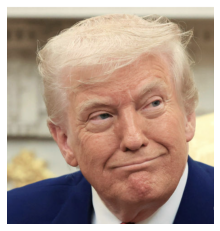

In [168]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/trump.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§ÏßÄ Î™ªÌñàÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [169]:
# ÏñºÍµ¥ Í≤ÄÏ∂ú
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [170]:
# ÎûúÎìúÎßàÌÅ¨ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [171]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂îÏ∂ú
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print("Go")

Go


rectangles[[(245, 246) (707, 708)]]


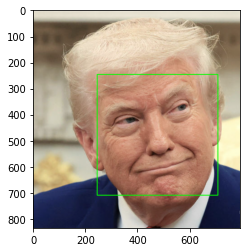

In [172]:
# Ï∞æÎäî ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [173]:
# Ïä§Ìã∞Ïª§ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === ÌïµÏã¨ ÏàòÏ†ï ÌååÌä∏ ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # üî• ÏΩî Ï§ëÏã¨ (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # ÏΩî Ï§ëÏïô Í∏∞Ï§ÄÏúºÎ°ú ÏúÑÏπò Ï°∞Ï†ï
    refined_x = x - w // 2
    refined_y = y - h // 2

    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥Ñ Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


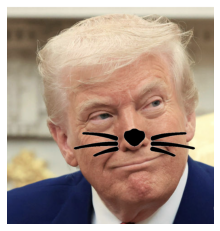

In [174]:
# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

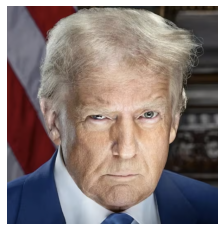

In [175]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/trumpfront.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§ÏßÄ Î™ªÌñàÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [176]:
# ÏñºÍµ¥ Í≤ÄÏ∂ú
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [177]:
# ÎûúÎìúÎßàÌÅ¨ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [178]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂îÏ∂ú
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print("Go")

Go


rectangles[[(171, 231) (438, 498)]]


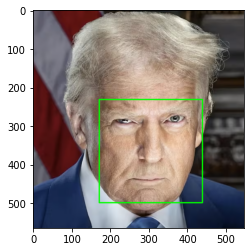

In [179]:
# Ï∞æÎäî ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [180]:
# Ïä§Ìã∞Ïª§ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === ÌïµÏã¨ ÏàòÏ†ï ÌååÌä∏ ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # üî• ÏΩî Ï§ëÏã¨ (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # ÏΩî Ï§ëÏïô Í∏∞Ï§ÄÏúºÎ°ú ÏúÑÏπò Ï°∞Ï†ï
    refined_x = x - w // 2
    refined_y = y - h // 2

    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥Ñ Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


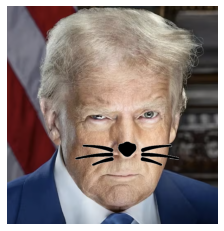

In [181]:
# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

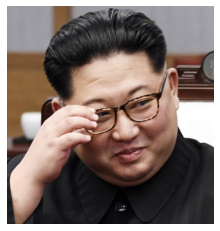

In [182]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/kim.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§ÏßÄ Î™ªÌñàÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [183]:
# ÏñºÍµ¥ Í≤ÄÏ∂ú
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [184]:
# ÎûúÎìúÎßàÌÅ¨ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [185]:
# ÎûúÎìúÎßàÌÅ¨ Ï∂îÏ∂ú
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print("Go")

Go


rectangles[[(171, 171) (438, 439)]]


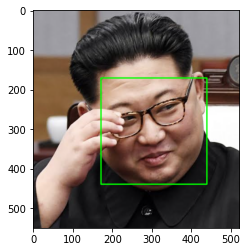

In [186]:
# Ï∞æÎäî ÏñºÍµ¥ÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [187]:
# Ïä§Ìã∞Ïª§ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Î°úÎî©
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === ÌïµÏã¨ ÏàòÏ†ï ÌååÌä∏ ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # üî• ÏΩî Ï§ëÏã¨ (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # ÏΩî Ï§ëÏïô Í∏∞Ï§ÄÏúºÎ°ú ÏúÑÏπò Ï°∞Ï†ï
    refined_x = x - w // 2
    refined_y = y - h // 2

    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥Ñ Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞Î•º ÎåÄÎπÑÌï¥ clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


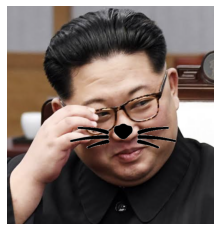

In [188]:
# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()